1. Import altair.

In [71]:
import altair as alt

alt.data_transformers.enable('json');
alt.renderers.enable('default');

2. Import the zipcodes dataset from vega_datasets.

In [3]:
from vega_datasets import data

zipcodes_url = data.zipcodes.url # passing url instead of a dataframe to `alt.Chart` minimizes errors
zipcodes = data.zipcodes()
zipcodes.head()

,zip_code,latitude,longitude,city,state,county
0,00501,40.922326,-72.637078,Holtsville,NY,Suffolk
1,00544,40.922326,-72.637078,Holtsville,NY,Suffolk
2,00601,18.165273,-66.722583,Adjuntas,PR,Adjuntas
3,00602,18.393103,-67.180953,Aguada,PR,Aguada
4,00603,18.455913,-67.145780,Aguadilla,PR,Aguadilla


In [4]:
zipcodes = data.zipcodes(dtype={'zip_code': 'category'})
zipcodes.head()

,zip_code,latitude,longitude,city,state,county
0,00501,40.922326,-72.637078,Holtsville,NY,Suffolk
1,00544,40.922326,-72.637078,Holtsville,NY,Suffolk
2,00601,18.165273,-66.722583,Adjuntas,PR,Adjuntas
3,00602,18.393103,-67.180953,Aguada,PR,Aguada
4,00603,18.455913,-67.145780,Aguadilla,PR,Aguadilla


In [5]:
zipcodes.zip_code.dtype

CategoricalDtype(categories=['00501', '00544', '00601', '00602', '00603', '00604',
                  '00605', '00606', '00610', '00611',
                  ...
                  '99919', '99921', '99922', '99923', '99925', '99926',
                  '99927', '99928', '99929', '99950'],
                 ordered=False)

In [6]:
alt.Chart(zipcodes_url).mark_circle().encode(
    x='longitude:Q',
    y='latitude:Q',
)

alt.Chart(...)

# Task 1: Adjust the color, circle size, width and height of the chart.

In [68]:
alt.Chart(zipcodes_url,width=800,height=600).mark_circle(size=10, color='blue').encode(
    x='longitude:Q',
    y='latitude:Q',
)

alt.Chart(...)

# Task 2: Draw an equirectangular projection by specifying X and Y as longitude and latitude.

In [69]:
alt.Chart(zipcodes_url,width=800,height=600).mark_circle(size=10, color='blue').encode(
    x='longitude:Q',
    y='latitude:Q',
).project(type = 'equirectangular')

alt.Chart(...)

# Task 3: Use the project method to draw the map in the AlbersUsa projection.

In [70]:
alt.Chart(zipcodes_url).mark_circle().encode(
    longitude = 'longitude:Q',
    latitude = 'latitude:Q',
).project(type = 'albersUsa')


alt.Chart(...)

The zipcodes of cities across the US are organized hierarchically. Let's visualize the heirarchy by categorizing the zip codes based on the first digit.

In [72]:
from altair.expr import datum, substring

alt.Chart(zipcodes_url).mark_circle(size=2).transform_calculate(
    'first_digit', substring(datum.zip_code, 0, 1)
).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='first_digit:N',
).project(
    type='albersUsa'
).properties(
    width=800,
    height=600,
)


alt.Chart(...)

# Task 4.1 Extract the first two digits, name it as two_digits, and declare that as a quantitative variable

In [73]:
from altair.expr import datum, substring
alt.Chart(zipcodes_url).mark_circle(size=2).transform_calculate(
    'two_digits', substring(datum.zip_code, 0, 2)
     
).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='two_digits:Q',
).project(
    type='albersUsa'
).properties(
    width=700,
    height=400,
)

alt.Chart(...)

# Task 4.2 Discuss what kind of patterns you see and what it tells us about the US.

In both the plots, we can see that the zipcodes are ordered from east to west, i.e., the zipcodes that start with the 0 are in the right most corner of the chart, while the zipcode that start with number 9 are in the left-most corner of the chart.

In the first plot where we categorized the zipcodes based on the first digit, it's evident that cities in neighboring states have the same first digit. For example- zip codes in states like Michigan, Ohio, Indiana, Kentucky start with the digit 4.

In the second plot, we can clearly see that the zip codes follow the same ordering from east to west as in the first plot. The darker the shade of blue, further west is the area represted by the zipcode.

Observing the patterns in the plots, we can clearly infer the relative position (east/west) of zipcodes. For example- The zip code 47404 would be in the easter side of zipcode 47408.

# Task 4.3 Declare the first two digits as a categorical variable.

In [74]:
from altair.expr import datum, substring

alt.Chart(zipcodes_url).mark_circle(size=2).transform_calculate(
    'two_digits', substring(datum.zip_code, 0, 2)
     
).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='two_digits:N',
).project(
    type='albersUsa'
).properties(
    width=800,
    height=600,
)

alt.Chart(...)

# Task 5. Add a tooltip that displays the zipcode when you mouse-over it

In [75]:
from altair.expr import datum, substring
alt.Chart(zipcodes_url).mark_circle(size=2).transform_calculate(
    'two_digits', substring(datum.zip_code, 0, 2)
).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='two_digits:N',
    tooltip = ['zip_code:N','county:N', 'city:N', 'state:N']
).project(
    type='albersUsa'
).properties(
    width=800,
    height=600,
)

alt.Chart(...)

<b>Choropleth</b>

Now let's use the US county / state boundary data (us_10m) from vega-datasets.

In [76]:
usmap = data.us_10m()
usmap.keys()

dict_keys(['type', 'transform', 'objects', 'arcs'])

In [77]:
usmap['type']

'Topology'

In [78]:
usmap['transform']

{'scale': [0.003589294092944858, 0.0005371535195261037],
 'translate': [-179.1473400003406, 17.67439566600018]}

In [79]:
usmap['objects'].keys()

dict_keys(['counties', 'states', 'land'])

This data contains not only county-level boundaries (objects), but also states and land boundaries

In [80]:
usmap['objects']['land']['type'], usmap['objects']['states']['type'], usmap['objects']['counties']['type']

('MultiPolygon', 'GeometryCollection', 'GeometryCollection')

Looking at state as a set of arcs:

In [81]:
state1 = usmap['objects']['states']['geometries'][1]
state1

{'type': 'MultiPolygon',
 'arcs': [[[10337]],
  [[10342]],
  [[10341]],
  [[10343]],
  [[10834, 10340]],
  [[10344]],
  [[10345]],
  [[10338]]],
 'id': 15}

The arcs are defined as usmap['arcs']

In [82]:
usmap['arcs'][:10]


[[[15739, 57220], [0, 0]],
 [[15739, 57220], [29, 62], [47, -273]],
 [[15815, 57009], [-6, -86]],
 [[15809, 56923], [0, 0]],
 [[15809, 56923], [-36, -8], [6, -210], [32, 178]],
 [[15811, 56883], [9, -194], [44, -176], [-29, -151], [-24, -319]],
 [[15811, 56043], [-12, -216], [26, -171]],
 [[15825, 55656], [-2, 1]],
 [[15823, 55657], [-19, 10], [26, -424], [-26, -52]],
 [[15804, 55191], [-30, -72], [-47, -344]]]

Processing the data using inbuilt tools:

In [83]:
states = alt.topo_feature(data.us_10m.url, 'states')
states

UrlData({
  format: TopoDataFormat({
    feature: 'states',
    type: 'topojson'
  }),
  url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
})

# Task 6.1 Find a mark for geographical shapes from here https://altair-viz.github.io/user_guide/marks.html and draw the states.

In [84]:
alt.Chart(states).mark_geoshape(
    ).encode(
    ).properties(
        width=800,
        height=600
    ).project(type = 'equirectangular')

alt.Chart(...)

# Task 6.2 Project the chart using the albersUsa

In [85]:
alt.Chart(states).mark_geoshape(
    ).encode(
    ).properties(
        width=800,
        height=600
    ).project(type = 'albersUsa')

alt.Chart(...)

In [86]:
counties=alt.topo_feature(data.us_10m.url,'counties')
alt.Chart(counties).mark_geoshape(
    ).encode(
    ).properties(
        width=800,
        height=600
    ).project(type = 'albersUsa')

alt.Chart(...)

# County-level unemployment data

Now let's look at the unemployment data across the US counties-

In [87]:
unemp_data = data.unemployment(sep='\t')
unemp_data.head()

,id,rate
0,1001,0.097
1,1003,0.091
2,1005,0.134
3,1007,0.121
4,1009,0.099


In [88]:
us_counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url #using a url in the lookup below
alt.Chart(us_counties).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

alt.Chart(...)

<b>Raster visualization with datashader</b>

Import the required libraries

In [89]:
%matplotlib inline

import pandas as pd
import datashader as ds
from datashader import transfer_functions as tf
from colorcet import fire

In [90]:
nyctaxi_small = pd.read_csv('nyc_taxi_data_2014.csv', nrows=10000, 
                            usecols=['dropoff_longitude', 'dropoff_latitude'])
nyctaxi_small.head()

,dropoff_longitude,dropoff_latitude
0,-73.982227,40.731790
1,-73.960449,40.763995
2,-73.986626,40.765217
3,-73.979863,40.777050
4,-73.984367,40.720524


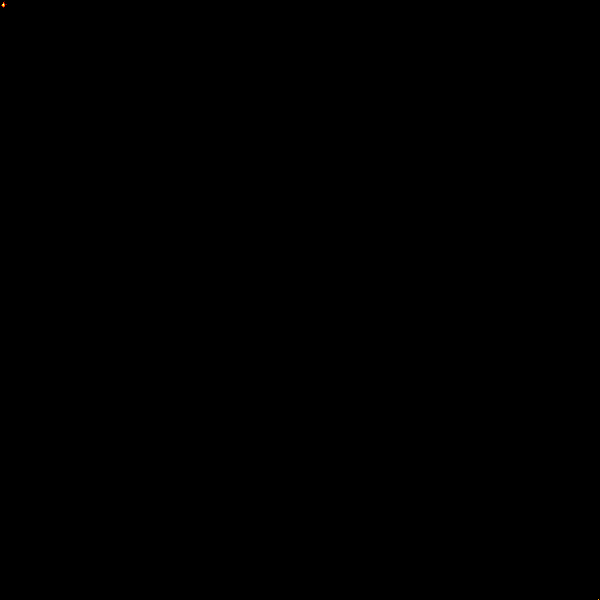

In [91]:
agg = ds.Canvas().points(nyctaxi_small, 'dropoff_longitude', 'dropoff_latitude')
tf.set_background(tf.shade(agg, cmap=fire),"black")

# Task 7.1 Check for missing data (NaNs), drop them and draw the map again.

In [92]:
nyctaxi_small.isna().sum()

dropoff_longitude    1
dropoff_latitude     1
dtype: int64

In [93]:
nyctaxi_small=nyctaxi_small.dropna()

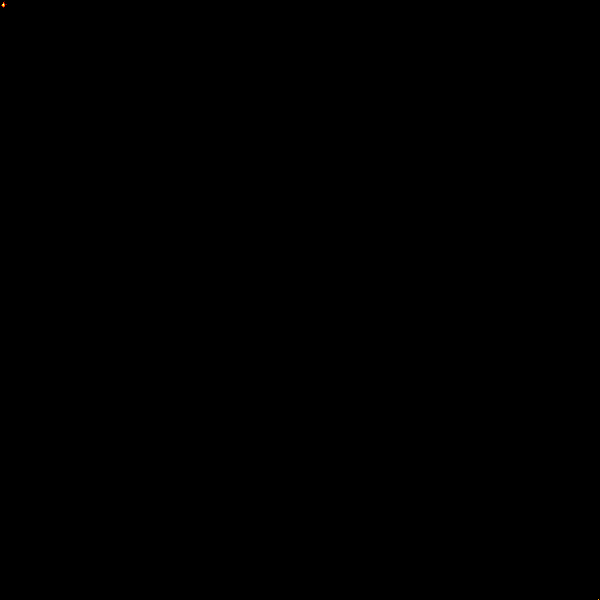

In [94]:
agg = ds.Canvas().points(nyctaxi_small, 'dropoff_longitude', 'dropoff_latitude')
tf.set_background(tf.shade(agg, cmap=fire),"black")

There are only two missing values in this abridged version of the dataset. So, missing values would hardly undermine the quality of the dataset for our visualization in this case.

# Task 7.2 Identify the issue and draw another map

The dataset represtents coordinates of locations across the New York City. In the previous we could a yellow dot in the top-left corner. I suspect that the this is a cluster of datapoints in our dataset. Any outliers which represent locations outside of NYC would have cuased the problem seen above. To fix this we can restrict the location coordinates with NYC as below - 

In [95]:
nyctaxi_small_filtered = nyctaxi_small[nyctaxi_small.dropoff_latitude.between(40.5,41)]
nyctaxi_small_filtered = nyctaxi_small_filtered[nyctaxi_small_filtered.dropoff_longitude.between(-74.1,-73.7)]

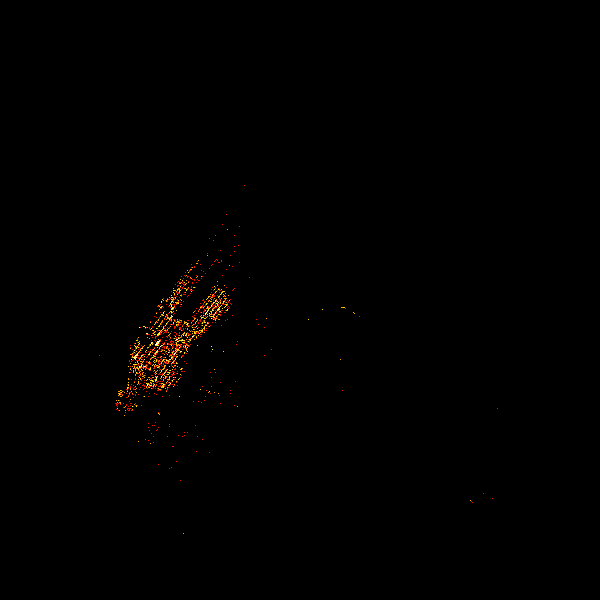

In [96]:
agg = ds.Canvas().points(nyctaxi_small_filtered, 'dropoff_longitude', 'dropoff_latitude')
tf.set_background(tf.shade(agg, cmap=fire),"black")

From the above plot, we can see that we have fixed the issue.

# Task 8.1 Load the whole dataset for those two variables and apply the same cleaning procedure you found above.

1. Load the entire dataset.

In [98]:
nyctaxi_full = pd.read_csv('nyc_taxi_data_2014.csv',
                            usecols=['dropoff_longitude', 'dropoff_latitude'])
nyctaxi_full.head()

,dropoff_longitude,dropoff_latitude
0,-73.982227,40.731790
1,-73.960449,40.763995
2,-73.986626,40.765217
3,-73.979863,40.777050
4,-73.984367,40.720524


2. Remove missing values

In [99]:
nyctaxi_full.isna().sum()

dropoff_longitude    145
dropoff_latitude     145
dtype: int64

In [100]:
nyctaxi_full=nyctaxi_full.dropna()

3. Restrict the location coordinates within NYC.

In [58]:
nyctaxi_full = nyctaxi_full[nyctaxi_full.dropoff_latitude.between(40.5,41)]
nyctaxi_full = nyctaxi_full[nyctaxi_full.dropoff_longitude.between(-74.1,-73.7)]

# Task 8.2 Feed the data into datashader to create a plot with the full dataset

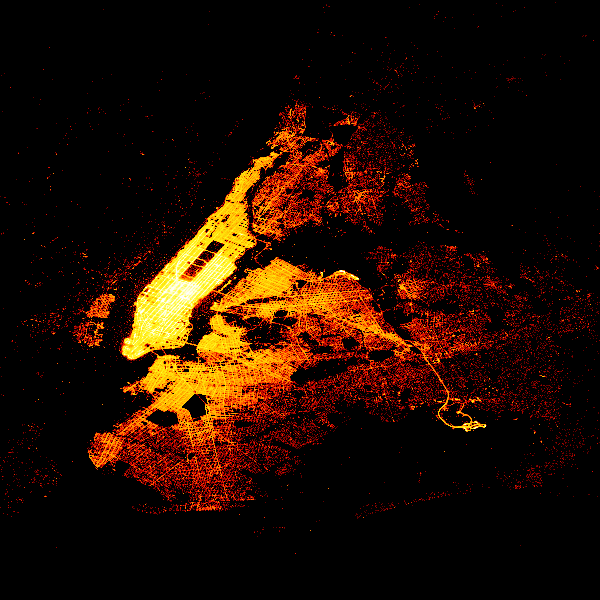

In [60]:
agg = ds.Canvas().points(nyctaxi_full, 'dropoff_longitude', 'dropoff_latitude')
tf.set_background(tf.shade(agg, cmap=fire),"black")